<a href="https://colab.research.google.com/github/dangdang2222/LG_Aimers/blob/main/xgb_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('./drive/MyDrive/LG_Aimer/train.csv')
test = pd.read_csv('./drive/MyDrive/LG_Aimer/test.csv')
meta_x_features= pd.read_csv('./drive/MyDrive/LG_Aimer/meta/x_feature_info.csv')
meta_y_features= pd.read_csv('./drive/MyDrive/LG_Aimer/meta/y_feature_info.csv')

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import random
import os
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)
seed_everything(42)

train_df = pd.read_csv('./drive/MyDrive/LG_Aimer/train.csv')
drop_sensors = ['ID','X_04', 'X_23', 'X_47', 'X_48','X_14','X_15','X_16','X_17','X_18']
train_df= train_df.drop(labels = drop_sensors,axis=1, inplace=False)
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

In [7]:
from sklearn.metrics import mean_squared_error
def nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(0,13): # ignore 'ID'
        rmse = mean_squared_error(np.array(gt)[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(np.array(gt)[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:15])
    return score

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, 
test_size=0.2, random_state=42)

import xgboost as xgb
xgb_2 = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma = 1, subsample=0.75, colsample_bytree = 1, max_depth=7)).fit(x_train, y_train)



[18:29:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [13]:
train_df = pd.read_csv('./drive/MyDrive/LG_Aimer/train.csv')
train_df= train_df.drop(labels = drop_sensors,axis=1, inplace=False)
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, 
test_size=0.2, random_state=42)
preds_2 = xgb_2.predict(x_val)
score2=nrmse(y_val,preds_2)
print(score2)


1.9193847169763514


In [15]:
preds_2.shape

(7922, 14)

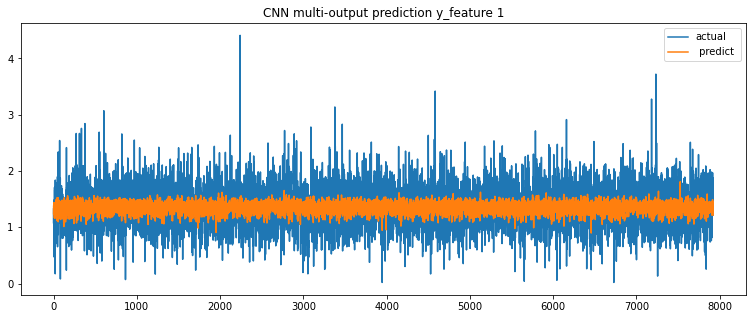

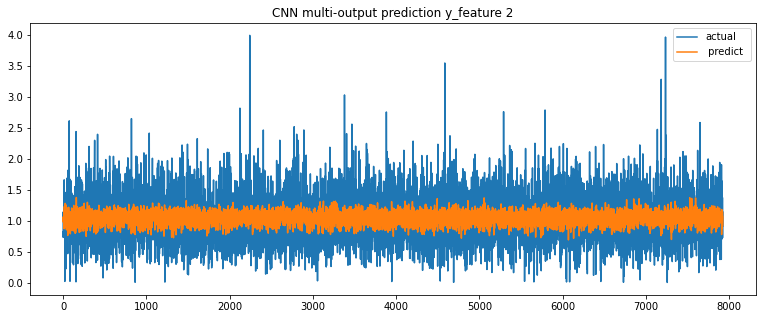

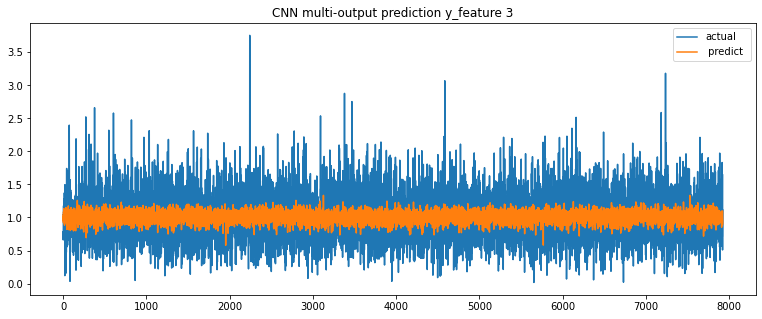

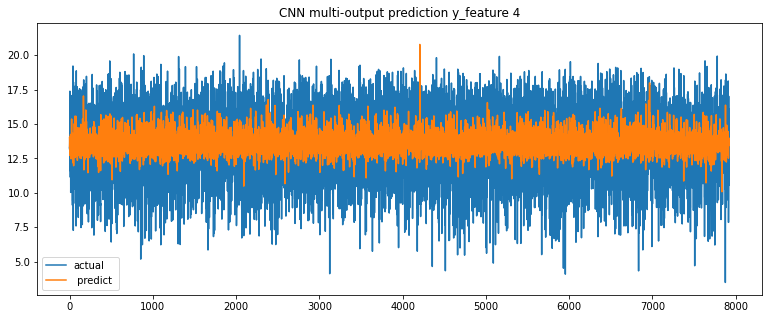

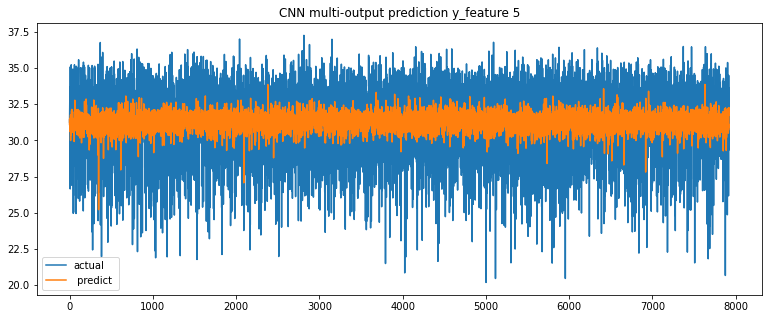

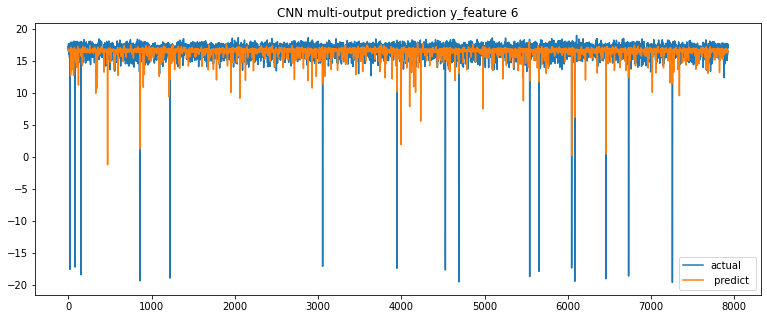

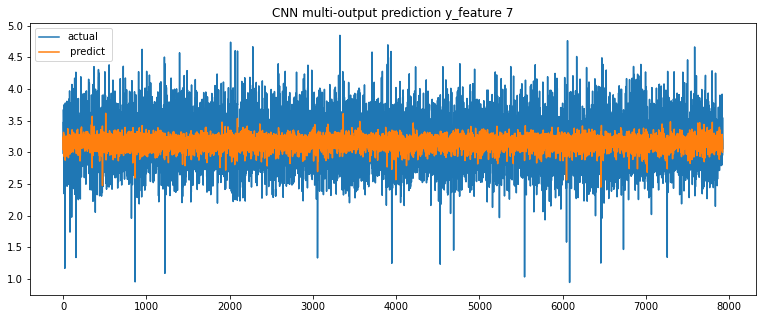

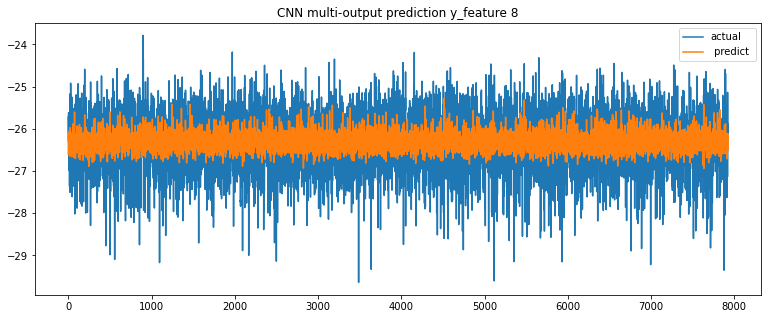

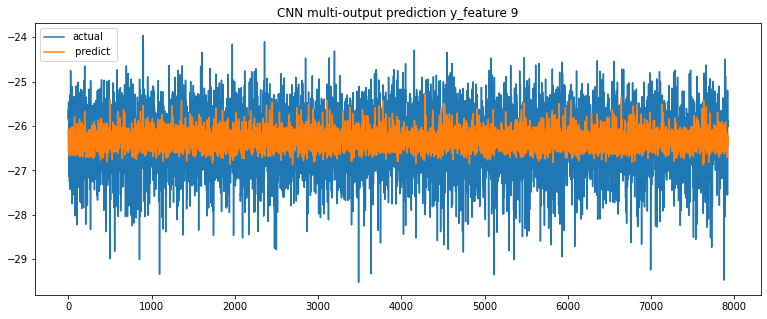

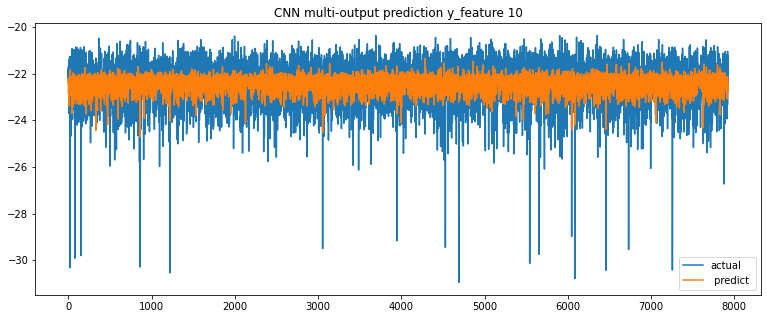

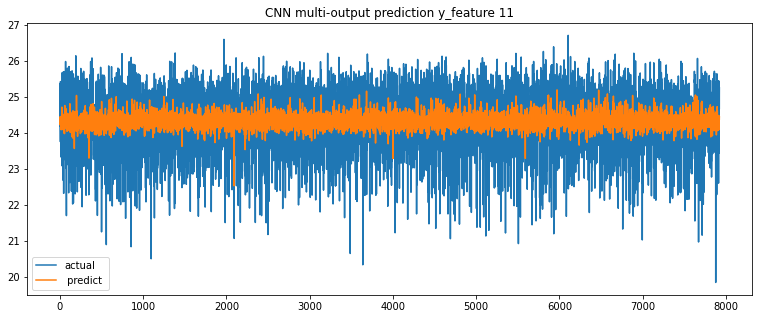

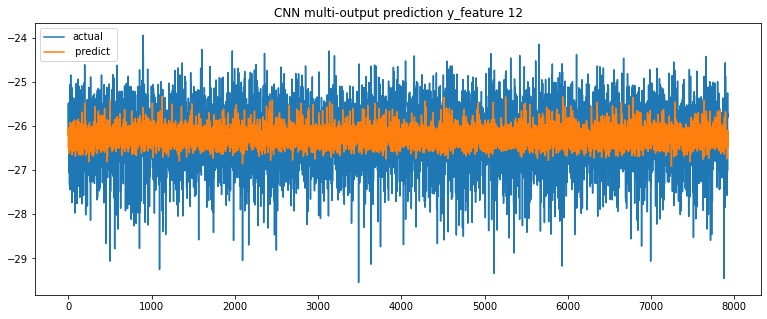

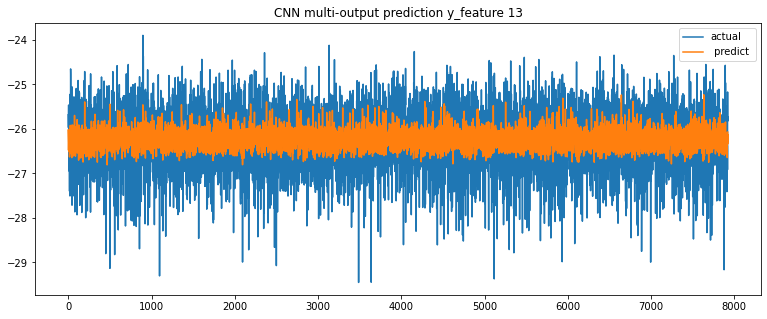

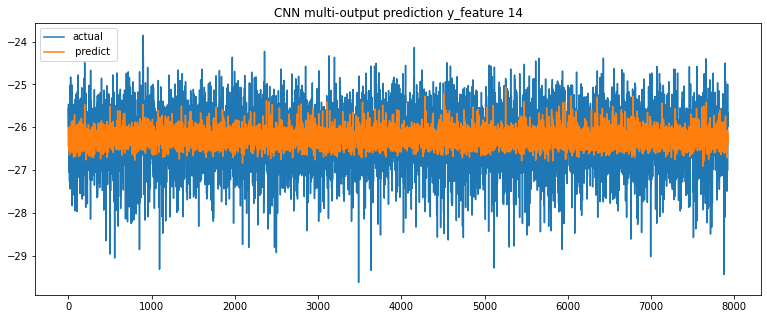

In [16]:
x_ax = range(len(x_val))

for i in range(14):
  plt.figure(figsize=(13,5))
  plt.title("CNN multi-output prediction y_feature " + str(i+1))
  plt.plot(x_ax, y_val.to_numpy()[:,i],label = 'actual' )
  plt.plot(x_ax, preds_2[:,i],label=' predict ')
  plt.legend()
  plt.show()

In [9]:
train_x = train.filter(regex='X') # Input : X Feature
train_y = train.filter(regex='Y') # Input : y Feature
df=train_y
df1=df[(df['Y_01']>=0.2)&(df['Y_01']<2.0)&(df['Y_02']>=0.2)
&(df['Y_02']<=2.1)&(df['Y_02']>=0.2)
&(df['Y_03']>=0.2)&(df['Y_03']<=2.1)
&(df['Y_04']<=19)&(df['Y_04']>=7)&(df['Y_05']<=36.5)&(df['Y_05']>=22)
&(df['Y_06']>=-19.2)&(df['Y_06']<=19)&(df['Y_07']>=2.4)&(df['Y_07']<=4)
&(df['Y_08']>=-29.2)&(df['Y_08']<=-24)&(df['Y_09']>=-29.2)&(df['Y_09']<=-24)
&(df['Y_10']>=-30.6)&(df['Y_10']<=-20)&(df['Y_11']>=19.6)&(df['Y_11']<=26.6)
&(df['Y_12']>=-29.2)&(df['Y_12']<=-24)&(df['Y_13']>=-29.2)&(df['Y_13']<=-24)
&(df['Y_14']>=-29.2)&(df['Y_14']<=-24)]
len(df1.index)


for idx in range(0,39607):
    if idx in df1.index:
        train_x.loc[idx,'X_60']=1
    else:
        train_x.loc[idx,'X_60']=0
train_x['X_60'].value_counts()

df1 = train_x.query('X_60 ==1')
df2= train_x.query('X_60==0')

df1_target= train_y.loc[df1.index,:]
df2_target = train_y.drop(index=df1.index)
drop_x_cols = ['X_04', 'X_23', 'X_47', 'X_48','X_14','X_15','X_16','X_17','X_18','X_60']
df1=df1.drop(columns=drop_x_cols)
df2=df2.drop(columns=drop_x_cols)

from sklearn.model_selection import train_test_split
x_train_pass, x_val_pass, y_train_pass, y_val_pass = train_test_split(df1, df1_target, 
test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

import xgboost as xgb
xgb_1 = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma = 1, subsample=0.75, colsample_bytree = 1, max_depth=7)).fit(x_train_pass, y_train_pass)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


[18:33:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:34:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [14]:
train_df = pd.read_csv('./drive/MyDrive/LG_Aimer/train.csv')
train_df= train_df.drop(labels = drop_sensors,axis=1, inplace=False)
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, 
test_size=0.2, random_state=42)
preds_1 = xgb_1.predict(x_val)
score1=nrmse(y_val,preds_1)
print(score1)

1.8521435772855044


In [ ]:
preds_1 = xgb_1.predict(x_val_pass)
score1=nrmse(y_val_pass,preds_1)

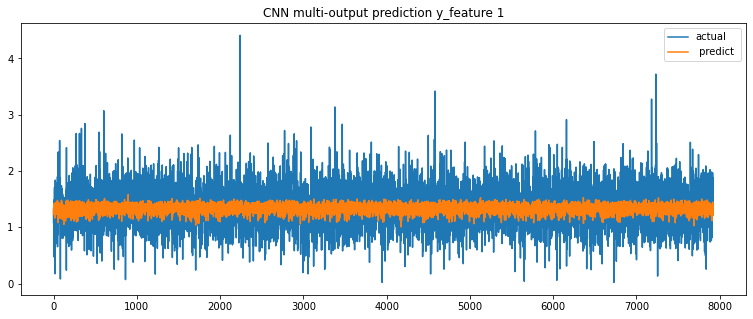

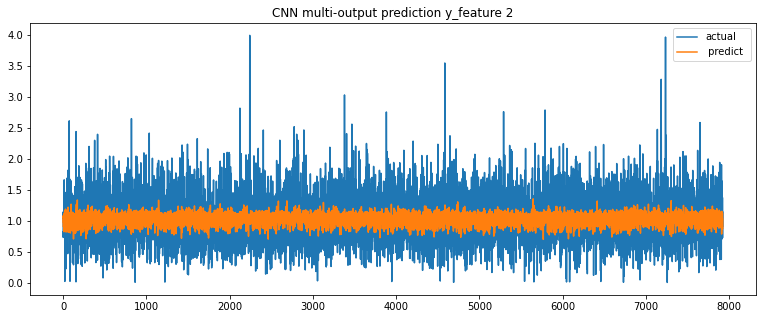

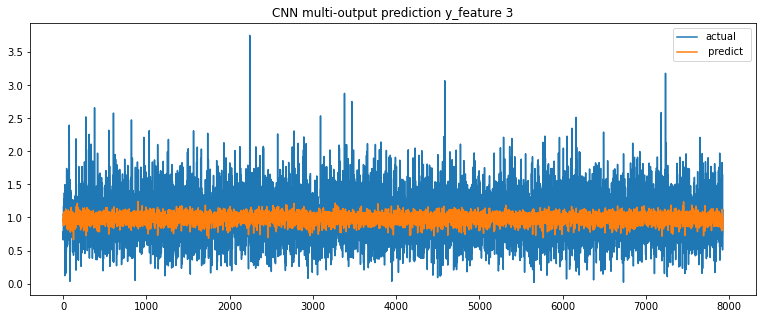

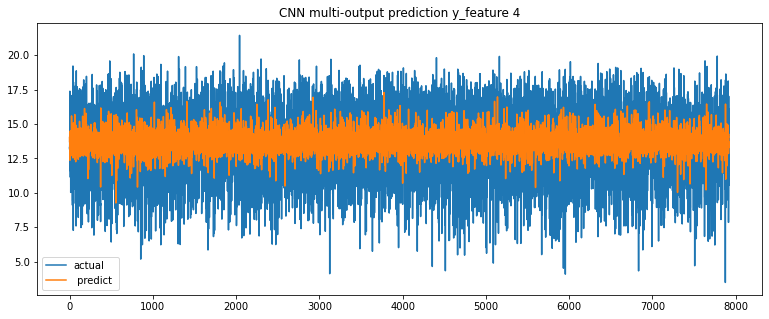

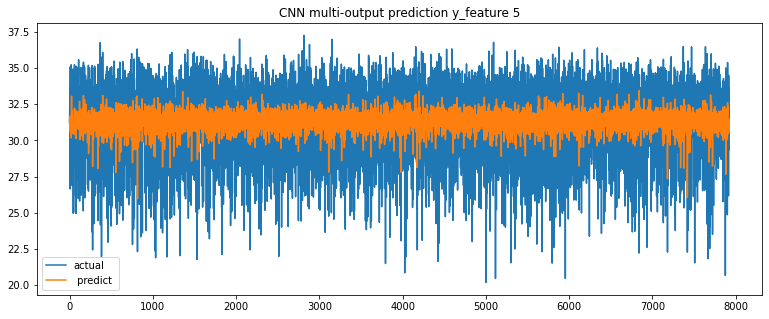

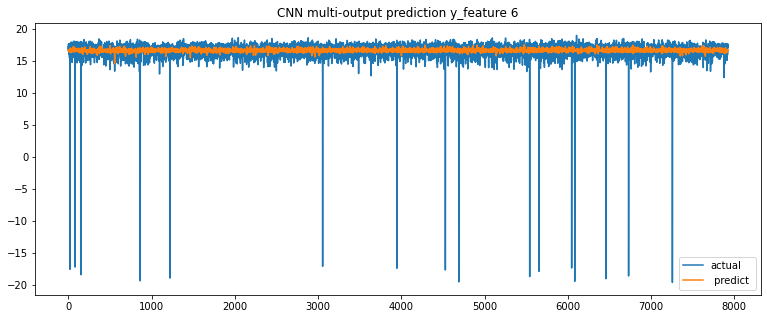

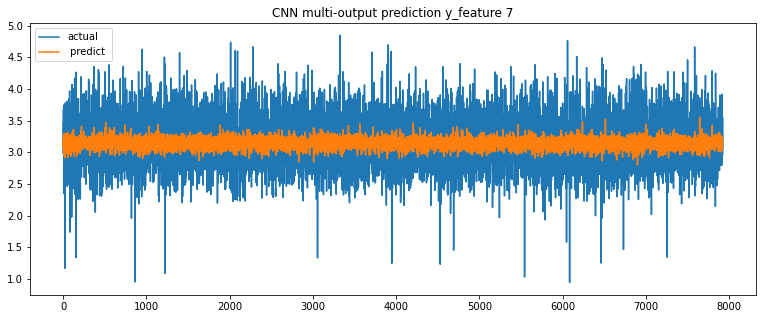

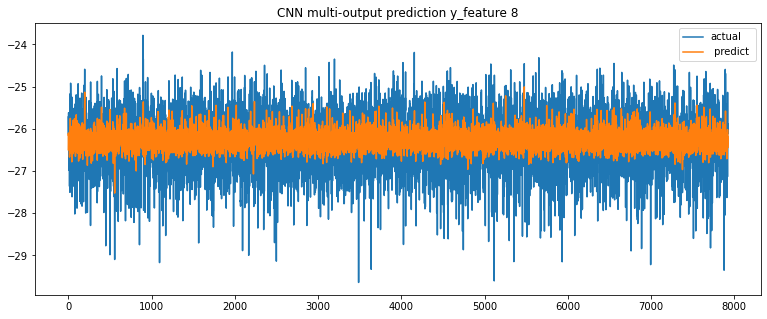

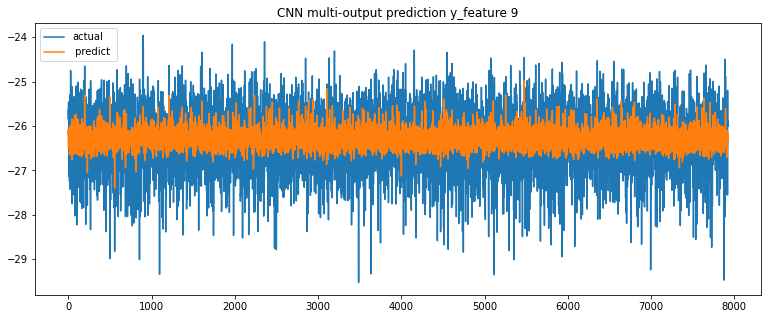

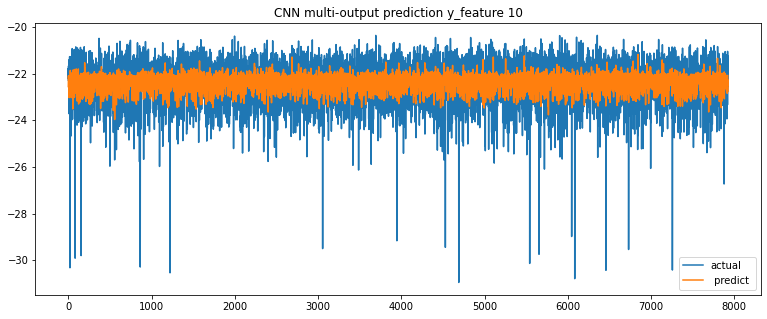

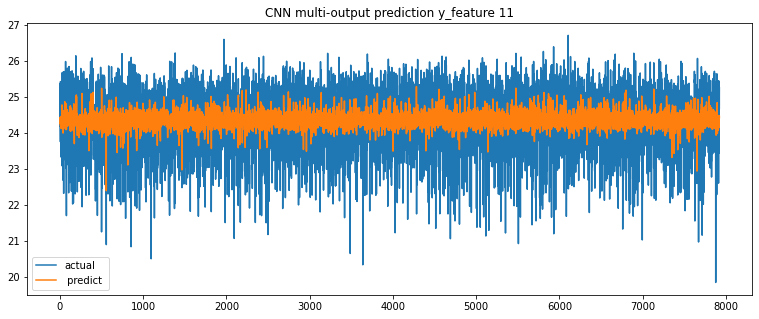

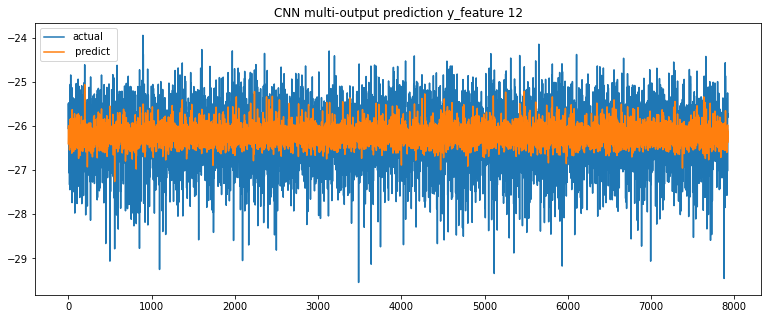

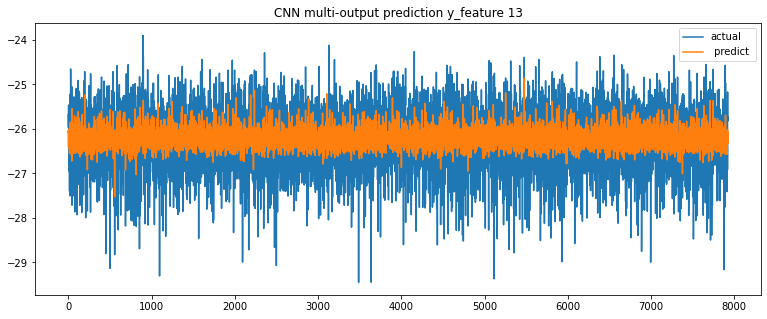

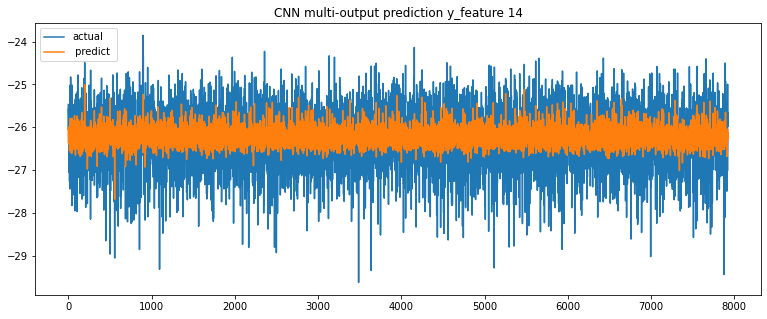

In [17]:
x_ax = range(len(x_val))

for i in range(14):
  plt.figure(figsize=(13,5))
  plt.title("CNN multi-output prediction y_feature " + str(i+1))
  plt.plot(x_ax, y_val.to_numpy()[:,i],label = 'actual' )
  plt.plot(x_ax, preds_1[:,i],label=' predict ')
  plt.legend()
  plt.show()